In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv("day.csv")

df, df_validate = np.split(df.sample(frac=1, random_state=0), [int(.8*len(df))])

d:\__STUDIUM\Proseminar-Bagging-Boosting-Ensemble-Learning\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


### Train / Test Split

In [3]:
def create_features(df):
    df = df.copy()

    features = [
        "season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed"
    ]

    X = df[features]
    y = df["cnt"]

    return X, y

### Create Model

In [4]:
def get_model(max_depth=7):
    model = DecisionTreeRegressor(
        random_state=0,
        max_depth=max_depth
    )
    
    return model

In [5]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)
scores = []

for train_index, test_index in kf.split(df):
    train = df.iloc[train_index]
    test = df.iloc[test_index]

    X_train, y_train = create_features(df=train)
    X_test, y_test = create_features(df=test)

    model = get_model()

    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    scores.append(score)

print(np.average(scores))
print(scores)

0.7915415664079772
[0.8314371604416783, 0.8046520097624988, 0.7498454109839927, 0.8776040747170762, 0.8170412968891814, 0.9380449818563287, 0.7625407356484823, 0.6456166665380756, 0.8120896710206139, 0.6765436562218432]


### Validation

In [6]:
X, y = create_features(df=df)
X_val, y_val = create_features(df=df_validate)

model = get_model()

model.fit(X, y)

model.score(X_val, y_val)

0.7696534379093999

### Plot

In [33]:
from sklearn.metrics import r2_score

X, y = create_features(df=df)
X_test, y_test = create_features(df=df_validate)

train_scores = []
test_scores = []
mapping = []

for max_depth in range(1, 31):
    model = get_model(max_depth=max_depth)

    model.fit(X, y)

    train_predictions = model.predict(X)
    test_predictions = model.predict(X_test)

    train_score = r2_score(y, train_predictions)
    test_score = r2_score(y_test, test_predictions)

    mapping.append(max_depth)
    train_scores.append(train_score)
    test_scores.append(test_score)

    print(f"MaxDepth: {max_depth} | Test score: {train_score:.3f} | Validation score: {test_score:.3f}")


MaxDepth: 1 | Test score: 0.398 | Validation score: 0.355
MaxDepth: 2 | Test score: 0.681 | Validation score: 0.688
MaxDepth: 3 | Test score: 0.788 | Validation score: 0.796
MaxDepth: 4 | Test score: 0.849 | Validation score: 0.807
MaxDepth: 5 | Test score: 0.888 | Validation score: 0.808
MaxDepth: 6 | Test score: 0.924 | Validation score: 0.775
MaxDepth: 7 | Test score: 0.948 | Validation score: 0.770
MaxDepth: 8 | Test score: 0.964 | Validation score: 0.749
MaxDepth: 9 | Test score: 0.978 | Validation score: 0.765
MaxDepth: 10 | Test score: 0.986 | Validation score: 0.776
MaxDepth: 11 | Test score: 0.992 | Validation score: 0.773
MaxDepth: 12 | Test score: 0.996 | Validation score: 0.782
MaxDepth: 13 | Test score: 0.998 | Validation score: 0.772
MaxDepth: 14 | Test score: 0.999 | Validation score: 0.769
MaxDepth: 15 | Test score: 1.000 | Validation score: 0.743
MaxDepth: 16 | Test score: 1.000 | Validation score: 0.765
MaxDepth: 17 | Test score: 1.000 | Validation score: 0.783
MaxDep

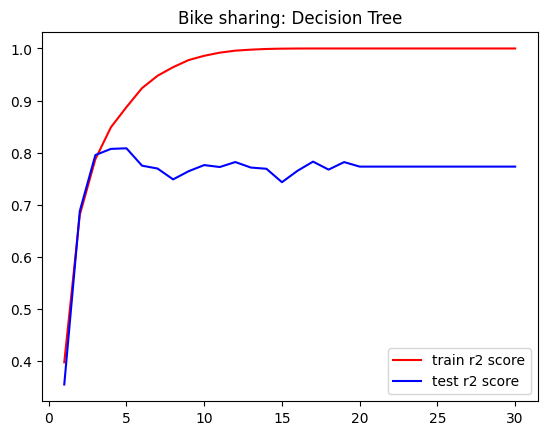

In [34]:
plt.title("Bike sharing: Decision Tree")
plt.plot(mapping, train_scores, color='red', label='train r2 score')
plt.plot(mapping, test_scores, color='blue', label='test r2 score')

plt.legend()

plt.savefig("figs/bs_decision-tree.png")
plt.show()